In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive

drive.mount('/content/drive')

PROJECT_PATH = "/content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01"
RAW_PATH = f"{PROJECT_PATH}/data/processed/IT24102753_scaled(1st).csv"

# Load dataset
df = pd.read_csv(RAW_PATH)
print("Dataset loaded:", df.shape)
df.head()

Mounted at /content/drive
Dataset loaded: (1025, 14)


,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,0
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,0
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,0
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,0
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,0


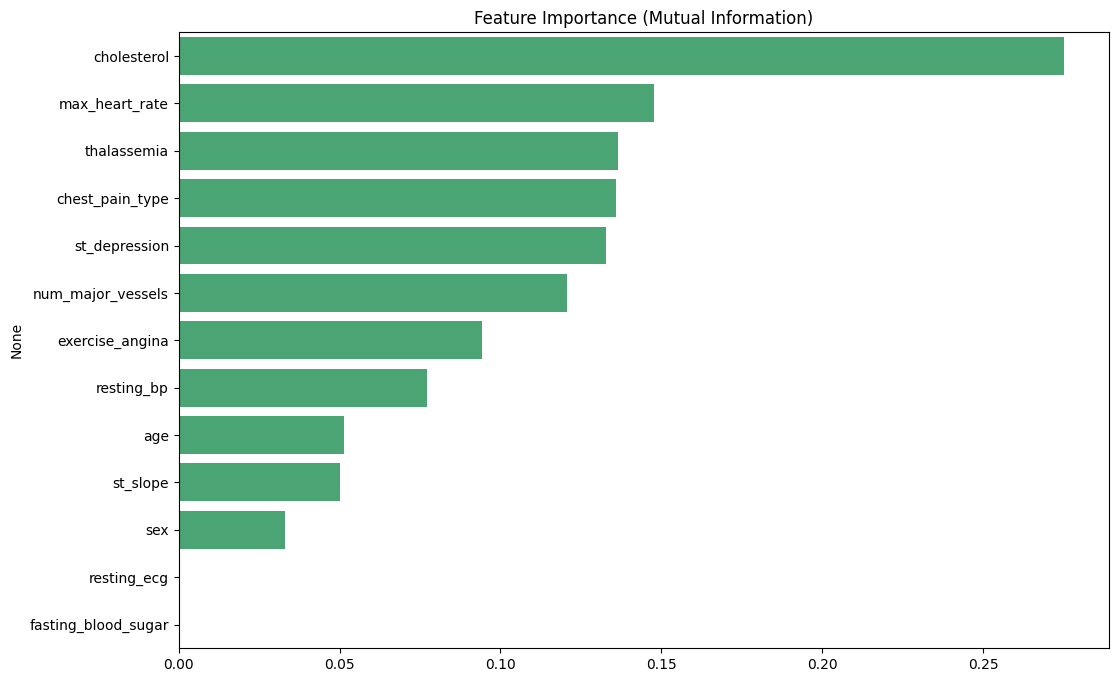

Top features:
 cholesterol          0.275314
max_heart_rate       0.147683
thalassemia          0.136632
chest_pain_type      0.135838
st_depression        0.132645
num_major_vessels    0.120577
exercise_angina      0.094175
resting_bp           0.077058
age                  0.051214
st_slope             0.050117
sex                  0.032968
resting_ecg          0.000515
dtype: float64


In [3]:
# Feature Selection with Mutual Information

from sklearn.feature_selection import mutual_info_classif

# Drop rows with missing values for feature selection
X_clean = df.drop(columns=['heart_disease']).dropna()
y_clean = df.loc[X_clean.index, 'heart_disease']

# Mutual Information scores
mi = mutual_info_classif(X_clean, y_clean, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi, index=X_clean.columns).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12,8))
sns.barplot(x=mi_series.values, y=mi_series.index, color="mediumseagreen")
plt.title("Feature Importance (Mutual Information)")
plt.show()

print("Top features:\n", mi_series.head(12))

# Select Best Features
top_features = mi_series.head(12).index.tolist()   # pick best 12 features
df_selected = df[top_features + ['heart_disease']]       # keep selected + target

In [5]:
# Define save folder
PROJECT_PATH = "/content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01"
SAVE_FOLDER = os.path.join(PROJECT_PATH, "results/eda_visualizations/feature_selection")
os.makedirs(SAVE_FOLDER, exist_ok=True)

# Plot and save Mutual Information bar chart
plt.figure(figsize=(8,4))
sns.barplot(x=mi_series.values, y=mi_series.index, color="mediumseagreen")
plt.title("Feature Importance (Mutual Information)")
plt.tight_layout()

plot_path = os.path.join(SAVE_FOLDER, "mutual_information.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.close()
print("Plot saved to:", plot_path)

Plot saved to: /content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01/results/eda_visualizations/feature_selection/mutual_information.png


In [6]:
# Updates .csv file save
df_final = df_selected.copy()
print("Final dataset ready for ML:", df_final.shape)

PROJECT_PATH = "/content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01"
PROC_PATH = os.path.join(PROJECT_PATH, "data/processed/IT24102739_selected_features(2nd).csv")
os.makedirs(os.path.dirname(PROC_PATH), exist_ok=True)
df_final.to_csv(PROC_PATH, index=False)

print("Saved selected features dataset to:", PROC_PATH)

Final dataset ready for ML: (1025, 13)
Saved selected features dataset to: /content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01/data/processed/IT24102739_selected_features(2nd).csv
